General solution: [Eq(Integral(1/sqrt(C1 + exp(-2*_u)), (_u, y(x))), C2 + x), Eq(Integral(1/sqrt(C1 + exp(-2*_u)), (_u, y(x))), C2 - x)]


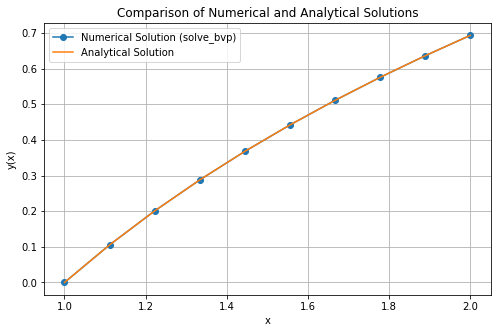

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
import sympy as sp

x, C1, C2 = sp.symbols('x C1 C2')
y = sp.Function('y')(x)
eq = sp.Eq(sp.diff(y, x, x), -sp.exp(-2 * y))
sol = sp.dsolve(eq, y)
print("General solution:", sol)

def odes(x, u):
    return np.vstack((u[1], -np.exp(-2 * u[0])))

def boundary_conditions(ua, ub):
    return np.array([ua[0], ub[0] - np.log(2)])

x_mesh = np.linspace(1, 2, 10)
u_init = np.zeros((2, x_mesh.size))
sol_bvp = solve_bvp(odes, boundary_conditions, x_mesh, u_init)

plt.figure(figsize=(8, 5))
plt.plot(sol_bvp.x, sol_bvp.y[0], label='Numerical Solution (solve_bvp)', marker='o')

x_vals = np.linspace(1, 2, 100)
y_vals = np.log(x_vals)
# plt.plot(x_vals, y_vals, 'r--', label='Assumed Analytical Solution')

plt.xlabel('x')
plt.ylabel('y(x)')
plt.plot(x_mesh, np.log(x_mesh), label="Analytical Solution")
plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend()
plt.grid(True)
plt.show()

Failed to solve symbolically: solve: Cannot solve y(x)*log(y(x)) - cos(x)*Derivative(y(x), x) + Derivative(y(x), (x, 2))


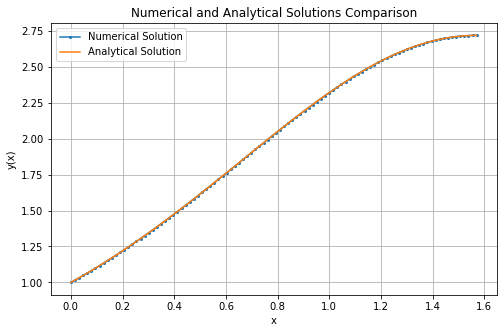

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
import sympy as sp

# Define symbols
x = sp.symbols('x')
y = sp.Function('y')(x)

# Define the differential equation
eq = sp.Eq(y.diff(x, x), y.diff(x) * sp.cos(x) - y * sp.log(y))

# Attempt to solve the differential equation analytically
try:
    sol_symbolic = sp.dsolve(eq, y)
    print("Symbolic Solution:")
    sp.pprint(sol_symbolic)
    # Create a function from the symbolic solution if possible
    y_analytical = sp.lambdify(x, sol_symbolic.rhs, 'numpy')
except Exception as e:
    print(f"Failed to solve symbolically: {e}")
    y_analytical = None

# Define the ODEs for numerical solution
def odes(x, u):
    return np.vstack((u[1], u[1] * np.cos(x) - u[0] * np.log(u[0])))

# Define the boundary conditions
def boundary_conditions(ua, ub):
    return np.array([ua[0] - 1, ub[0] - np.exp(1)])

# Mesh setup
x_mesh = np.linspace(0, np.pi / 2, 100)
u_init = np.zeros((2, x_mesh.size))
u_init[0, :] = np.linspace(1, np.exp(1), x_mesh.size)  # Linear initial guess

# Solve the BVP
sol_bvp = solve_bvp(odes, boundary_conditions, x_mesh, u_init)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sol_bvp.x, sol_bvp.y[0], 'o-', label='Numerical Solution', markersize=2)
if y_analytical:
    x_vals = np.linspace(0, np.pi / 2, 400)
    y_vals = y_analytical(x_vals)
    plt.plot(x_vals, y_vals, 'r--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.plot(x_mesh, np.exp(np.sin(x_mesh)), label="Analytical Solution")
plt.title('Numerical and Analytical Solutions Comparison')
plt.legend()
plt.grid(True)
plt.show()

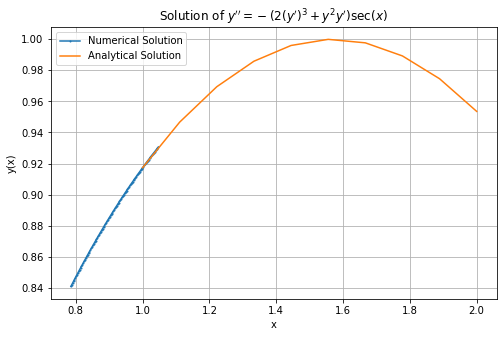

The solution converged successfully.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# Constants for the problem
pi = np.pi

# Define the system of first-order ODEs
def odes(x, y):
    y1, y2 = y
    dy1dx = y2
    dy2dx = -(2 * y2**3 + y1**2 * y2) * (1 / np.cos(x))
    return np.array([dy1dx, dy2dx])

# Boundary conditions
def boundary_conditions(ya, yb):
    return np.array([ya[0] - 2**(-1/4), yb[0] - (12**(1/4) / 2)])

# Mesh and initial guess
x = np.linspace(pi/4, pi/3, 100)
y_guess = np.zeros((2, x.size))
y_guess[0, :] = np.linspace(2**(-1/4), 12**(1/4) / 2, x.size)

# Solve the BVP
sol = solve_bvp(odes, boundary_conditions, x, y_guess)

# Plotting the solution
plt.figure(figsize=(8, 5))
plt.plot(sol.x, sol.y[0], label='Numerical Solution', marker='o', markersize=1)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.plot(x_mesh, np.sqrt(np.sin(x_mesh)), label="Analytical Solution")
plt.title('Solution of $y\'\' = -(2(y\')^3 + y^2 y\') \sec(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Verifying solution correctness
if sol.status == 0:
    print("The solution converged successfully.")
else:
    print("The solution did not converge.")

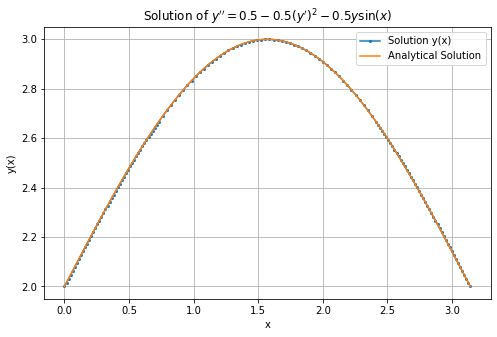

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# Define the system of ODEs
def odes(x, u):
    return np.vstack((u[1], 0.5 - 0.5 * u[1]**2 - 0.5 * u[0] * np.sin(x)))

# Define the boundary conditions
def boundary_conditions(ua, ub):
    return np.array([ua[0] - 2, ub[0] - 2])

# Set up the mesh for solution
x_mesh = np.linspace(0, np.pi, 100)

# Initial guess for the solution (can be refined to improve convergence)
u_init = np.zeros((2, x_mesh.size))
u_init[0, :] = 2  # Assuming a constant function y(x) = 2 as a first guess

# Solve the BVP
sol = solve_bvp(odes, boundary_conditions, x_mesh, u_init)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(sol.x, sol.y[0], label='Solution y(x)',marker='o', markersize=2)
plt.plot(x_mesh,2+np.sin(x_mesh), label="Analytical Solution")
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Solution of $y\'\' = 0.5 - 0.5(y\')^2 - 0.5y \sin(x)$')
plt.legend()
plt.grid(True)
plt.show()